**Importing necessary Libararies**

In [ ]:
import numpy as np
import cv2
import PIL.Image as Image
import os

import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

**Downloading the pre trained model**

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

**Now Let us try and predict how this classifier is working**

I have downloaded a gold fish image for predicting

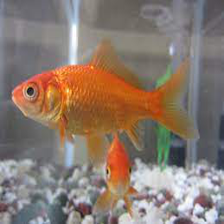

In [ ]:
gold_fish = Image.open("/content/gold fish.jpg").resize(IMAGE_SHAPE)
gold_fish

Scaling the downloaded image

In [ ]:
gold_fish = np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [ ]:
gold_fish[np.newaxis, ...]

array([[[[0.43137255, 0.45490196, 0.52156863],
         [0.45882353, 0.47843137, 0.54117647],
         [0.4745098 , 0.48235294, 0.54509804],
         ...,
         [0.31764706, 0.30196078, 0.30588235],
         [0.31764706, 0.30196078, 0.29803922],
         [0.31764706, 0.30196078, 0.29803922]],

        [[0.43529412, 0.45882353, 0.5254902 ],
         [0.4627451 , 0.48235294, 0.54509804],
         [0.47843137, 0.48627451, 0.54901961],
         ...,
         [0.31764706, 0.30196078, 0.30588235],
         [0.31764706, 0.30196078, 0.29803922],
         [0.31764706, 0.30196078, 0.29803922]],

        [[0.45098039, 0.4745098 , 0.54117647],
         [0.47843137, 0.49803922, 0.56078431],
         [0.49411765, 0.50196078, 0.56470588],
         ...,
         [0.32156863, 0.30588235, 0.31372549],
         [0.32156863, 0.30588235, 0.30588235],
         [0.32156863, 0.30588235, 0.30588235]],

        ...,

        [[0.59215686, 0.58431373, 0.58823529],
         [0.57647059, 0.56862745, 0.57254902]

Making prediction

In [ ]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'goldfish'

**It did good now let's download the flower images dataset**

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)#doing this will help us go recursively and fetch the path for all the images
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:7]

[PosixPath('datasets/flower_photos/sunflowers/7012366081_019c8a17a4_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/20704967595_a9c9b8d431.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9213511121_836a458021_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15238348741_c2fb12ecf2_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3840761441_7c648abf4d_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5037531593_e2daf4c7f1.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/8038712786_5bdeed3c7f_m.jpg')]

In [ ]:
#total number of Images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
#Storing the paths of all roses into a list
roses = list(data_dir.glob('roses/*'))
roses[:7]

[PosixPath('datasets/flower_photos/roses/537207677_f96a0507bb.jpg'),
 PosixPath('datasets/flower_photos/roses/5333437251_ce0aa6925d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5835539224_75967fc400_m.jpg'),
 PosixPath('datasets/flower_photos/roses/9159362388_c6f4cf3812_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15277801151_5ed88f40f0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/13264214185_d6aa79b3bd.jpg'),
 PosixPath('datasets/flower_photos/roses/6241886381_cc722785af.jpg')]

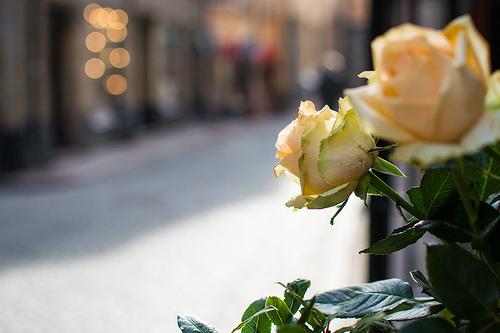

In [ ]:
#Sample image of a rose
Image.open(str(roses[5]))

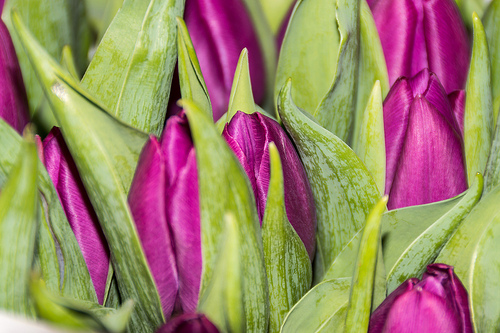

In [ ]:
#Storing the paths of all tulips into a list and a sample image 
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[5]))

Making a dictionary whose key holds are flower names and value holds the path

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

Making another dictionary whose key holds are flower names and value holds index

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:7]

[PosixPath('datasets/flower_photos/roses/537207677_f96a0507bb.jpg'),
 PosixPath('datasets/flower_photos/roses/5333437251_ce0aa6925d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5835539224_75967fc400_m.jpg'),
 PosixPath('datasets/flower_photos/roses/9159362388_c6f4cf3812_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15277801151_5ed88f40f0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/13264214185_d6aa79b3bd.jpg'),
 PosixPath('datasets/flower_photos/roses/6241886381_cc722785af.jpg')]

In [ ]:
str(flowers_images_dict['roses'][3])

'datasets/flower_photos/roses/9159362388_c6f4cf3812_n.jpg'

We need to resize the image and get it into a proper shape

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(375, 500, 3)

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

Now let's do the reshaping for all the images

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

Split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Let us now scale the images

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X_train_scaled[0]

array([[[0.08627451, 0.1372549 , 0.14117647],
        [0.0745098 , 0.12941176, 0.12156863],
        [0.08627451, 0.13333333, 0.14509804],
        ...,
        [0.36470588, 0.45882353, 0.48235294],
        [0.37647059, 0.4627451 , 0.48235294],
        [0.34901961, 0.44313725, 0.46666667]],

       [[0.07843137, 0.1254902 , 0.12941176],
        [0.07058824, 0.1254902 , 0.12156863],
        [0.07843137, 0.1254902 , 0.14117647],
        ...,
        [0.38823529, 0.4745098 , 0.49803922],
        [0.38431373, 0.46666667, 0.49411765],
        [0.36078431, 0.45098039, 0.48235294]],

       [[0.08235294, 0.12941176, 0.13333333],
        [0.08235294, 0.12941176, 0.1254902 ],
        [0.08235294, 0.12941176, 0.14117647],
        ...,
        [0.39607843, 0.48235294, 0.50588235],
        [0.37647059, 0.46666667, 0.49803922],
        [0.36470588, 0.45490196, 0.48235294]],

       ...,

       [[0.09411765, 0.18039216, 0.16862745],
        [0.09411765, 0.17647059, 0.16470588],
        [0.09411765, 0

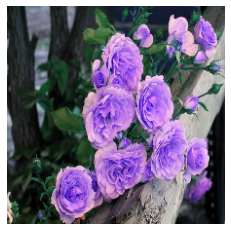

In [ ]:
plt.axis('off')
plt.imshow(X[0])

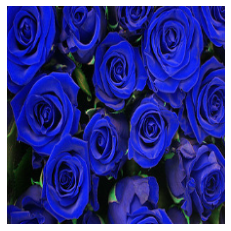

In [ ]:
plt.axis('off')
plt.imshow(X[1])

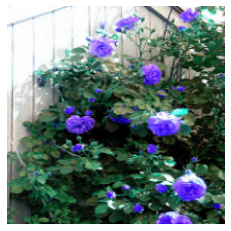

In [ ]:
plt.axis('off')
plt.imshow(X[2])

In [ ]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(predicted,axis=1)
predicted

array([722, 795, 795])

In [ ]:
image_labels[722]

'pillow'

In [ ]:
image_labels[795]

'shower curtain'

**Let's now get the feature extrator alone and not th classification from the above classifier**

What that means is that the feature extraction process , the weights assigned in each hidden layer will remain same and we will only be changing the values that it predicts

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)#trainable is given false because we don't want to change the weights , and just what the model predicts


In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 74s 814ms/step - loss: 0.8157 - acc: 0.6908
Epoch 2/10
86/86 [==============================] - 70s 812ms/step - loss: 0.4174 - acc: 0.8539
Epoch 3/10
86/86 [==============================] - 70s 818ms/step - loss: 0.3233 - acc: 0.8972
Epoch 4/10
86/86 [==============================] - 70s 811ms/step - loss: 0.2730 - acc: 0.9121
Epoch 5/10
86/86 [==============================] - 70s 814ms/step - loss: 0.2384 - acc: 0.9281
Epoch 6/10
86/86 [==============================] - 70s 812ms/step - loss: 0.2025 - acc: 0.9451
Epoch 7/10
86/86 [==============================] - 70s 812ms/step - loss: 0.1829 - acc: 0.9542
Epoch 8/10
86/86 [==============================] - 70s 815ms/step - loss: 0.1614 - acc: 0.9582
Epoch 9/10
86/86 [==============================] - 70s 812ms/step - loss: 0.1450 - acc: 0.9680
Epoch 10/10
86/86 [==============================] - 70s 814ms/step - loss: 0.1307 - acc: 0.9742


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 25s 817ms/step - loss: 0.3575 - acc: 0.8715


[0.3575253486633301, 0.8714597225189209]